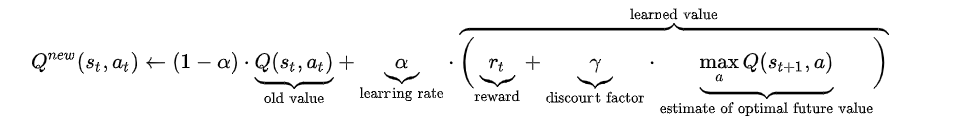

In [131]:
#On OS X, you can install ffmpeg via `brew install ffmpeg'
import gym # gym is for playing with reinforcement stuff
from gym import wrappers
import numpy as np
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True 

In [132]:
## helpers
def showRender():
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

def get_discrete_state(state):
    discrete_state=(state-env.observation_space.low)/discrete_win_size
    return tuple(discrete_state.astype(np.int))

In [141]:
env=gym.make('MountainCar-v0') # three actions in this env: 0-go left, 1-do nothing, 2-push right
env=wrappers.Monitor(env, "./gym-results", force=True)
temp_states=[]
discrete_os_size=[20] * len(env.observation_space.high) #seperating it into 20 chunks
discrete_win_size=(env.observation_space.high-env.observation_space.low)/discrete_os_size


##setting param
learning_rate=0.1
discount=0.95 # how important is future actions?
train_size=2500
show_every=100

## implementation
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n]) #init the Q-table
for episode in range(train_size):
    done=False
    discrete_state=get_discrete_state(env.reset())
    while not done:
        action=np.argmax(q_table[discrete_state]) # always exploit?
        new_state,reward,done,info=env.step(action)
        # states is a venctor of position and velocity; reward is a float; done is a flag
        new_discrete_state=get_discrete_state(new_state)
        if not done:
            max_future_q=np.max(q_table[new_discrete_state]) 
            # this compute the based on the biggest Q regardless of which action
            current_q=q_table[discrete_state+(action,)]
            new_q=(1-learning_rate)*current_q+learning_rate*(reward+discount*max_future_q)
            q_table[discrete_state+(action,)]=new_q
        elif new_state[0]>=env.goal_position:
            q_table[discrete_state+(action,)]=0 # rewarding
        discrete_state=new_discrete_state
        temp_states.append(new_discrete_state)
    if episode%show_every==0:
        print(discrete_state,episode,reward,action)
    states=np.array(temp_states)
env.close()

(9, 14) 0 -1.0 2
(6, 9) 100 -1.0 2
(5, 15) 200 -1.0 0
(3, 14) 300 -1.0 0
(5, 14) 400 -1.0 1
(15, 11) 500 -1.0 1
(5, 3) 600 -1.0 2
(1, 12) 700 -1.0 2
(13, 7) 800 -1.0 0
(18, 11) 900 -1.0 0
(3, 15) 1000 -1.0 0
(1, 3) 1100 -1.0 1
(0, 12) 1200 -1.0 2
(4, 1) 1300 -1.0 0
(19, 13) 1400 -1.0 2


KeyboardInterrupt: 

In [136]:
showRender()

In [111]:
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n])
get_discrete_state(env.reset())
test_q=q_table[get_discrete_state(env.reset())]


[-1.44991664 -1.41888251 -0.61828475]


2

In [ ]:
def dumbHcode(action,new_state):
    #new_state is [position,V]
    if new_state[1]

In [124]:
test=np.array([1,2])
[test+(3,)]

[array([4, 5])]

In [ ]:
help(env.step)